In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import metrics
from sklearn import tree

In [4]:
df=pd.read_csv('iris.csv')

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.shape

(150, 5)

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [11]:
df.duplicated().sum()

3

In [12]:
df.drop_duplicates(inplace = True)

In [13]:
df.duplicated().sum()

0

In [14]:
df.groupby('species')['sepal_length'].mean()

species
setosa        5.010417
versicolor    5.936000
virginica     6.604082
Name: sepal_length, dtype: float64

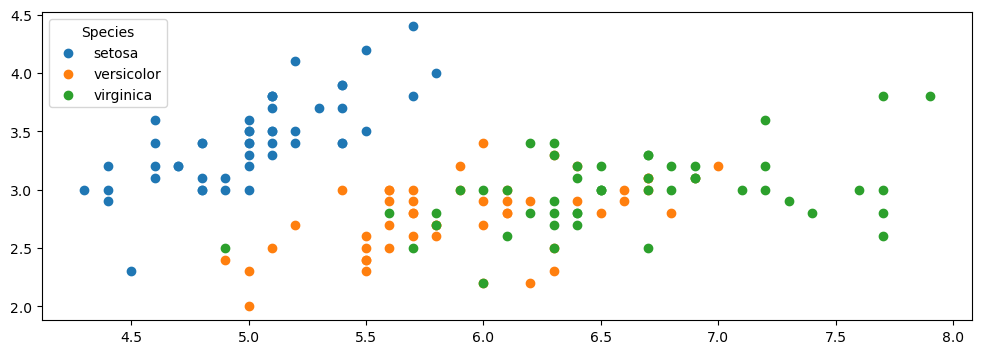

In [15]:
plt.figure(figsize = (12,4))
for species, data in df.groupby('species'):
    plt.scatter(data['sepal_length'], data['sepal_width'], label = species)
plt.legend(title = 'Species')
plt.show()

In [16]:
X = df.drop('species',axis =1)
y = df['species']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
y_pred = clf.predict(X_test)

In [20]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      0.91      0.95        11
   virginica       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [21]:
clf.get_depth()

5

In [22]:
clf.tree_.node_count

15

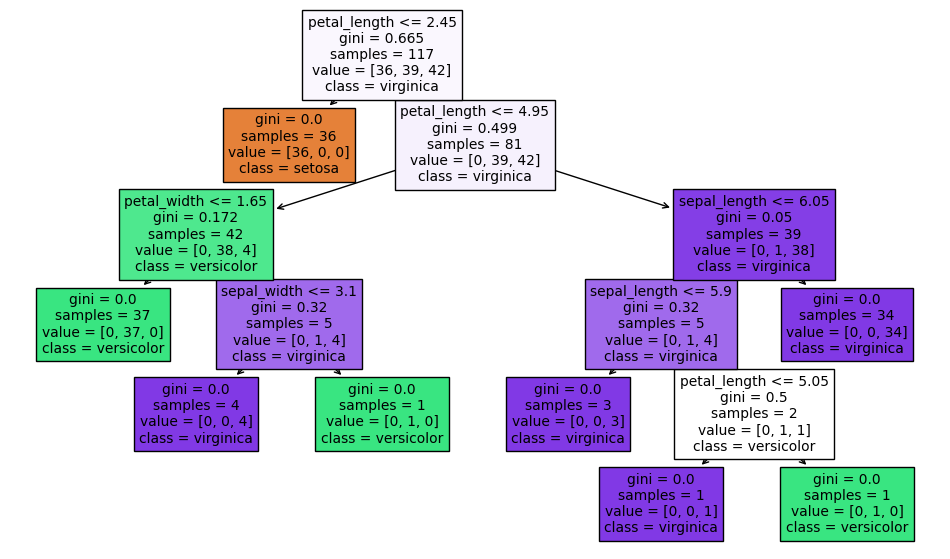

<Figure size 640x480 with 0 Axes>

In [23]:
plt.figure(figsize= (12,7))
tree.plot_tree(clf, feature_names=list(X.columns), 
              class_names=list(df.species.unique()), filled = True)
plt.show()
plt.savefig('tree.eps',format='eps',bbox_inches = "tight")